# In this notebook we analyze the results from get_random_data.jl of rho(epsilon)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from typing import Dict

sns.set_theme(style="darkgrid", palette="deep")

In [9]:
# Data params

# L_vals = [8000, 10_000, 12_000, 14_000, 16_000, 18_000, 20_000]
L_vals = [4_000, 6_000]
delta_vals = [0.001, 0.01, 0.1]
epsilon_vals = sorted(set([round(0.005 * i, ndigits=4) for i in range(176)] + [round(0.291 + 0.001 * i, ndigits=4) for i in range(7)]))

time_prefact = 200

num_initial_conds = 1000
initial_state_prob = 0.5



In [10]:

avrage_rho_per_ep : Dict[int, Dict[float, Dict[float, float]]] = {} # L_vals, delta_vals, epsilon: val
sem_rho_per_ep : Dict[int, Dict[float, Dict[float, float]]] = {}

for L_val in L_vals:
    avrage_rho_per_ep[L_val] = {}
    sem_rho_per_ep[L_val] = {}

    for delta_val in delta_vals:
        delta_val_name = f"{delta_val}".replace(".", "p")
        parent_path = f"data/time_rand_delta/rho_per_epsilon/IC1/L{L_val}/delta{delta_val_name}"

        avrage_rho_per_ep[L_val][delta_val] = {}
        sem_rho_per_ep[L_val][delta_val] = {}
        for epsilon_val in epsilon_vals:
            sample_filepath = f"{parent_path}/IC1_L{L_val}_epsilon{str(epsilon_val).replace("0.", "0p").replace("1.", "0p")}.csv"
            
            sample_df = pd.read_csv(sample_filepath)

            avrage_rho_per_ep[L_val][delta_val][epsilon_val] = sample_df["rho"].mean()
            sem_rho_per_ep[L_val][delta_val][epsilon_val] = sample_df["rho"].sem()
        

In [11]:
avrage_rho_per_ep[L_vals[0]].keys(), avrage_rho_per_ep[L_vals[0]][delta_vals[0]].keys()

(dict_keys([0.001, 0.01, 0.1]),
 dict_keys([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705,

# Basic plot of 1-rho per epsilon

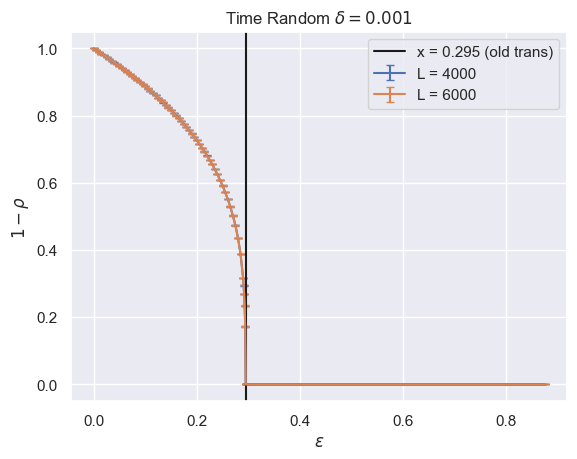

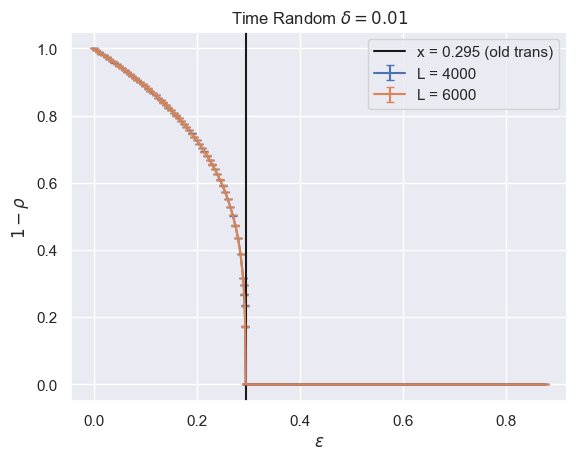

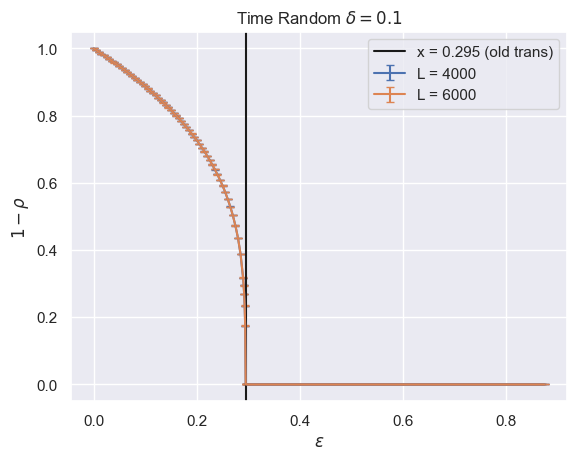

In [33]:
for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for L in L_vals:
        epsilon_vals = sorted(list(avrage_rho_per_ep[L][delta_val].keys()))
        plt.errorbar(
            epsilon_vals, 
            [1-avrage_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in epsilon_vals], 
            yerr=[sem_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in epsilon_vals],
            label = f"L = {L}",
            # fmt='--',  
            # markersize=3,
            capsize=3
            )
        
    plt.axvline(0.295, c = 'k', label=f"x = 0.295 (old trans)")
    plt.title(fr"Time Random $\delta = {delta_val}$")
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$1 - \rho$")
    plt.legend()


    plt.savefig(f"figs/timerandom_{delta_val_name}.png")
    plt.show()


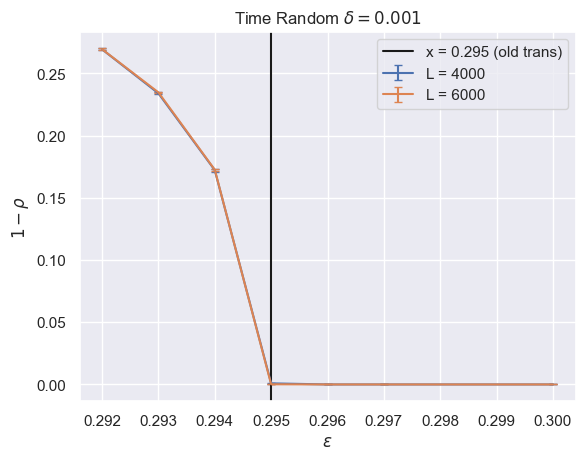

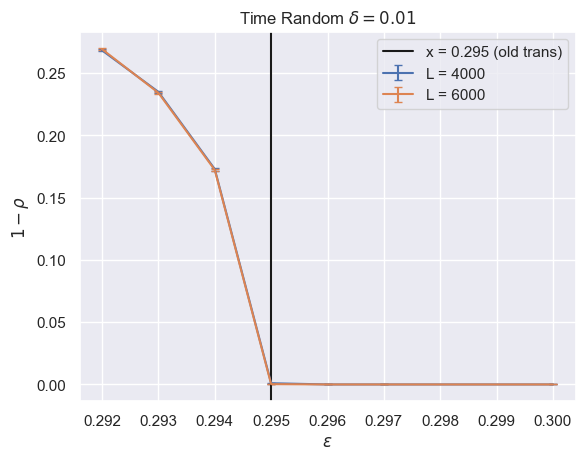

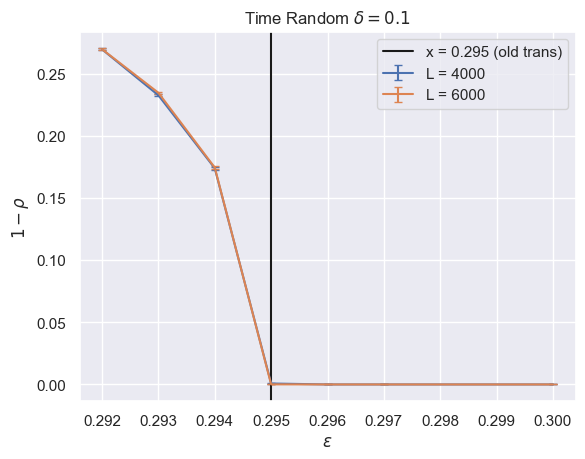

In [34]:
trans_window = (0.292, 0.3)

for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for L in L_vals:
        trans_epsilon_vals = sorted([epsilon for epsilon in avrage_rho_per_ep[L][delta_val].keys() if trans_window[0] <= epsilon <= trans_window[1]])
        plt.errorbar(
            trans_epsilon_vals, 
            [1-avrage_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in trans_epsilon_vals], 
            yerr=[sem_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in trans_epsilon_vals],
            label = f"L = {L}",
            # fmt='--',  
            # markersize=3,
            capsize=3
            )
        
    plt.axvline(0.295, c = 'k', label=f"x = 0.295 (old trans)")
    plt.title(fr"Time Random $\delta = {delta_val}$")
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$1 - \rho$")
    plt.legend()


    plt.savefig(f"figs/timerandom_zoomed_delta{delta_val_name}.png")
    plt.show()
